In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score



ModuleNotFoundError: No module named 'xgboost'

In [2]:
# read in dataset
df = pd.read_csv('../../Dataset/model_ready_dataset.csv')
df.head()

,city,state,coast,title,title_cleaned,price,current_price_cleaned,is_price_discounted_cleaned,link,room_type,...,rating_Check-in,rating_Value,superhost,is_superhost,house_rules,house_rules_cleaned,is_house_rules_present,num_of_amenities,available_amenities,available_amenities_cleaned
0,Washington,D.C.,East,PRO CLEANED! AMAZING Location - Steps 2 Union ...,PRO CLEANED! AMAZING Location - Steps 2 Union ...,"$229 \n$111 \nnight\n$111 per night, originall...",111,True,https://www.airbnb.com/rooms/37881373?adults=1...,Apartment in Washington,...,4.9,4.7,Superhost,True,"['2 guests maximum', 'No pets', 'Check-in afte...","'2 guests maximum', 'No pets', 'Check-in after...",True,27,"['Kitchen', 'Wifi', 'Dedicated workspace', 'TV...","'Kitchen', 'Wifi', 'Dedicated workspace', 'TV'..."
1,Washington,D.C.,East,"Mellow travelers welcome, share bathroom, frie...","Mellow travelers welcome, share bathroom, frie...",$67 \nnight\n$67 per night,67,False,https://www.airbnb.com/rooms/50545033?adults=1...,Private room in Washington,...,5.0,4.9,Superhost,True,"['', '', '', '', 'Quiet hours', 'Self check-in...","'Quiet hours', 'Self check-in with keypad', '...",True,29,"['Fast wifi – 54 Mbps', 'Central air condition...","'Fast wifi – 54 Mbps', 'Central air conditioni..."
2,Washington,D.C.,East,Premium King B - Yotel Washington DC,Premium King B - Yotel Washington DC,"$230 \n$178 \nnight\n$178 per night, originall...",178,True,https://www.airbnb.com/rooms/52255241?adults=1...,Hotel room in Washington,...,4.7,4.3,-,False,"['2 guests maximum', 'Check-in after 3:00 PM',...","'2 guests maximum', 'Check-in after 3:00 PM', ...",True,8,"['Wifi', 'TV', 'Air conditioning', 'Hair dryer...","'Wifi', 'TV', 'Air conditioning', 'Hair dryer'"
3,Washington,D.C.,East,"Cute and Convenient, 5 mins to Metro","Cute and Convenient, 5 mins to Metro",$85 \nnight\n$85 per night,85,False,https://www.airbnb.com/rooms/86602335525127075...,Apartment in Washington,...,NaN,NaN,-,False,"['4 guests maximum', 'No pets', 'Check-in afte...","'4 guests maximum', 'No pets', 'Check-in after...",True,43,"['Kitchen', 'Wifi', 'Dedicated workspace', 'Fr...","'Kitchen', 'Wifi', 'Dedicated workspace', 'Fre..."
4,Washington,D.C.,East,5 Star Cap Hill Apt-Free Parking-Best Location!,5 Star Cap Hill Apt-Free Parking-Best Location!,$124 \nnight\n$124 per night,124,False,https://www.airbnb.com/rooms/38478357?adults=1...,Apartment in Washington,...,5.0,5.0,Superhost,True,"['2 guests maximum', 'No pets', 'Check-in afte...","'2 guests maximum', 'No pets', 'Check-in after...",True,44,"['Park view', 'Kitchen', 'Wifi', 'Dedicated wo...","'Park view', 'Kitchen', 'Wifi', 'Dedicated wor..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13446 entries, 0 to 13445
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         13446 non-null  object 
 1   state                        13446 non-null  object 
 2   coast                        13446 non-null  object 
 3   title                        13446 non-null  object 
 4   title_cleaned                13446 non-null  object 
 5   price                        13446 non-null  object 
 6   current_price_cleaned        13446 non-null  int64  
 7   is_price_discounted_cleaned  13446 non-null  bool   
 8   link                         13446 non-null  object 
 9   room_type                    13446 non-null  object 
 10  room_type_cleaned            13446 non-null  object 
 11  max_guests                   13446 non-null  int64  
 12  num_rooms                    13446 non-null  int64  
 13  num_beds        

In [4]:
df['current_price_cleaned']

0        111
1         67
2        178
3         85
4        124
        ... 
13441     40
13442     41
13443     72
13444     75
13445     54
Name: current_price_cleaned, Length: 13446, dtype: int64

## Pre-processing dataset

In [5]:
# Convert catogorical variables to numeric & check the correlations 
lb = LabelEncoder()

df_num = df.copy()
df_num['room_type_numeric'] = LabelEncoder().fit_transform(df_num['room_type_cleaned'])
df_num['city_numeric'] = LabelEncoder().fit_transform(df_num['city'])
df_num['coast_numeric'] = LabelEncoder().fit_transform(df_num['coast'])
df_num['state_numeric'] = LabelEncoder().fit_transform(df_num['state'])
df_num['is_superhost'] = LabelEncoder().fit_transform(df_num['is_superhost'])
df_num['is_price_discounted_cleaned'] = LabelEncoder().fit_transform(df_num['is_price_discounted_cleaned'])

In [6]:
# Filter out rows with NaN values in the rating column
df_num = df_num[df_num["rating"].isna() == False]
df_num["rating"]

0        4.82
1        4.94
2        4.54
4        4.99
5        4.96
         ... 
13441    4.86
13442    4.73
13443    4.86
13444    5.00
13445    5.00
Name: rating, Length: 11894, dtype: float64

In [7]:
# Filter out rows with NaN values in the rating category columns
df_num = df_num[df_num["rating_Cleanliness"].isna() == False]
df_num.shape

(11651, 37)

In [8]:
# drop the old price column as we already have another column for price
df_num = df_num.drop(columns=['price'])
df_num.shape

(11651, 36)

In [9]:
# drop any columns that don't contain numeric data
reduced_df = df_num.select_dtypes(include=["number"])

In [10]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11651 entries, 0 to 13445
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   current_price_cleaned        11651 non-null  int64  
 1   is_price_discounted_cleaned  11651 non-null  int64  
 2   max_guests                   11651 non-null  int64  
 3   num_rooms                    11651 non-null  int64  
 4   num_beds                     11651 non-null  int64  
 5   num_baths                    11651 non-null  float64
 6   rating                       11651 non-null  float64
 7   reviews                      11651 non-null  float64
 8   rating_Cleanliness           11651 non-null  float64
 9   rating_Accuracy              11651 non-null  float64
 10  rating_Communication         11651 non-null  float64
 11  rating_Location              11651 non-null  float64
 12  rating_Check-in              11651 non-null  float64
 13  rating_Value    

In [11]:
reduced_df.shape

(11651, 20)


# Predict: Price

In [12]:
# only consider features we consider to be important to predict price target variable
columns_to_keep_price = ['max_guests', 'num_beds', 'num_baths', 'num_rooms', 'num_of_amenities',
                   'current_price_cleaned','rating']

In [13]:
df_price = reduced_df[columns_to_keep_price]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11651 entries, 0 to 13445
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   max_guests             11651 non-null  int64  
 1   num_beds               11651 non-null  int64  
 2   num_baths              11651 non-null  float64
 3   num_rooms              11651 non-null  int64  
 4   num_of_amenities       11651 non-null  int64  
 5   current_price_cleaned  11651 non-null  int64  
 6   rating                 11651 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 728.2 KB


In [14]:
# train-test split
X_price = df_price.drop(columns=['current_price_cleaned'])
y_price = np.log1p(df_price['current_price_cleaned'])

Xtrain_price, Xtest_price, ytrain_price, ytest_price = train_test_split(X_price, y_price, test_size=0.2, random_state=3)

In [15]:
Xtrain_price.shape, Xtest_price.shape

((9320, 6), (2331, 6))

## Model 1: XGBoost

In [16]:
xgb_price = XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_price.fit(Xtrain_price, ytrain_price)
ypred_price = xgb_price.predict(Xtest_price)
print('RMSE value is', np.sqrt(mean_squared_error(ytest_price, ypred_price)))
print("R2 value is:", r2_score(ytest_price, ypred_price))

RMSE value is 0.3646491656998209
R2 value is: 0.411432963149458


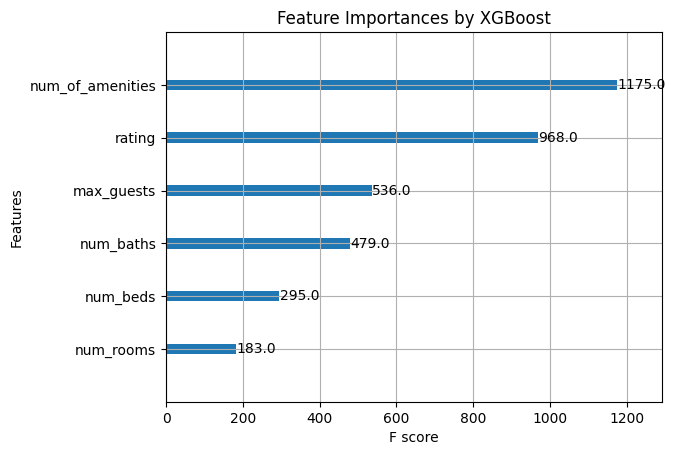

In [17]:
# plot feature importances
fig, ax = plt.subplots()
xgb.plot_importance(xgb_price, max_num_features=18, ax=ax)
plt.title("Feature Importances by XGBoost")
plt.show()

## Model 2: LightGBM

In [18]:
lgb_price = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
lgb_price.fit(Xtrain_price, ytrain_price)
ypred_price2 = lgb_price.predict(Xtest_price)
print('RMSE value is', np.sqrt(mean_squared_error(ytest_price, ypred_price2)))
print("R2 value is:", r2_score(ytest_price, ypred_price2))

RMSE value is 0.36610837145731095
R2 value is: 0.40671303568003514


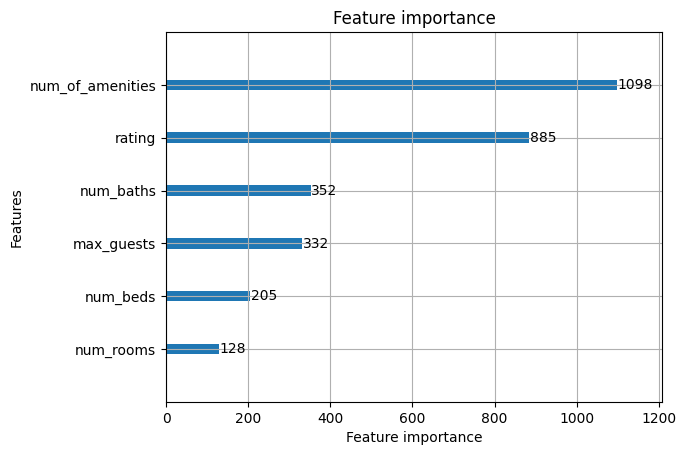

In [19]:
# plot feature importances
fig, ax = plt.subplots()
lgb.plot_importance(lgb_price, max_num_features=18, ax=ax)
plt.show()

## Model 3: Linear Regression

In [20]:
# Create linear regression object
reg_price = LinearRegression()
reg_price.fit(Xtrain_price, ytrain_price)
y_pred = reg_price.predict(Xtest_price)

mse = np.sqrt(mean_squared_error(ytest_price, y_pred))
print("RMSE is:", mse)
print("R2 is:", r2_score(ytest_price, y_pred))
# Print the coefficients of linear reg
print('Coefficients:', reg_price.coef_)

RMSE is: 0.3885494280875744
R2 is: 0.3317514346649104
Coefficients: [ 0.08873835  0.01636674 -0.03686919  0.07635042  0.00270657  0.33438546]


# Predict: Rating

In [21]:
# only consider features we consider to be important to predict rating target variable
columns_to_keep_rating = ['num_of_amenities','current_price_cleaned','rating', 'is_superhost', 
                          'rating_Accuracy', 'rating_Value', 'rating_Cleanliness']

In [22]:
df_rating = reduced_df[columns_to_keep_rating]
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11651 entries, 0 to 13445
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_of_amenities       11651 non-null  int64  
 1   current_price_cleaned  11651 non-null  int64  
 2   rating                 11651 non-null  float64
 3   is_superhost           11651 non-null  int64  
 4   rating_Accuracy        11651 non-null  float64
 5   rating_Value           11651 non-null  float64
 6   rating_Cleanliness     11651 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 728.2 KB


In [23]:
# train-test split
X_rating = df_rating.drop(columns=['rating'])
y_rating = df_rating['rating']

Xtrain_rating, Xtest_rating, ytrain_rating, ytest_rating = train_test_split(X_rating, y_rating, test_size=0.2, random_state=3)

In [24]:
Xtrain_rating.shape, Xtest_rating.shape

((9320, 6), (2331, 6))

## Model 1: XGBoost

In [25]:
xgb_rating = XGBRegressor(n_estimators=300, learning_rate=0.05)
xgb_rating.fit(Xtrain_rating, ytrain_rating)
ypred_rating = xgb_rating.predict(Xtest_rating)
print('RMSE value is', np.sqrt(mean_squared_error(ytest_rating, ypred_rating)))
print("R2 value is:", r2_score(ytest_rating, ypred_rating))

RMSE value is 0.07230630461703953
R2 value is: 0.8580552904666215


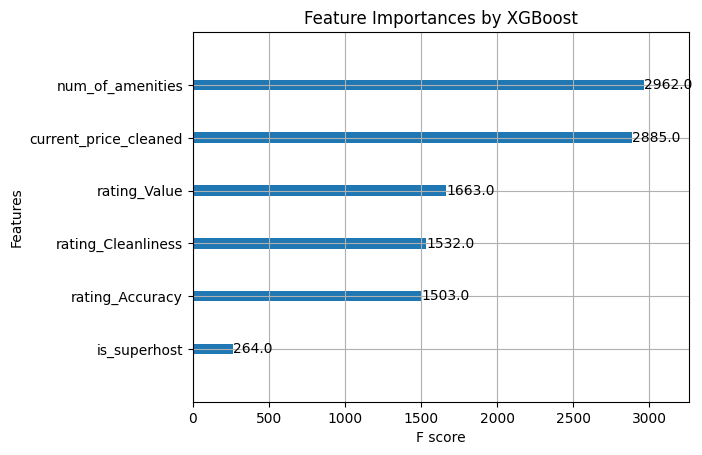

In [26]:
# plot feature importances
fig, ax = plt.subplots()
xgb.plot_importance(xgb_rating, max_num_features=18, ax=ax)
plt.title("Feature Importances by XGBoost")
plt.show()

## Model 2: LightGBM

In [27]:
lgb_rating = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
lgb_rating.fit(Xtrain_rating, ytrain_rating)
ypred_rating2 = lgb_rating.predict(Xtest_rating)
print('RMSE value is', np.sqrt(mean_squared_error(ytest_rating, ypred_rating2)))
print("R2 value is:", r2_score(ytest_rating, ypred_rating2))

RMSE value is 0.07198489481120682
R2 value is: 0.8593144067588067


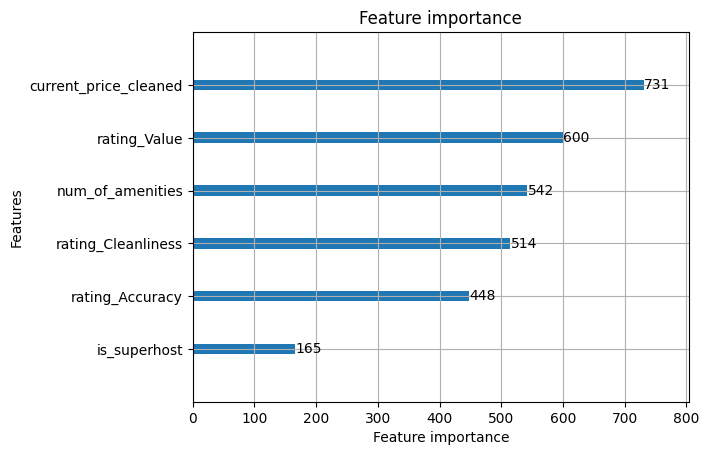

In [28]:
# plot feature importances
fig, ax = plt.subplots()
lgb.plot_importance(lgb_rating, max_num_features=18, ax=ax)
plt.show()

## Model 3: Linear Regression

In [29]:
# Create linear regression object
reg_rating = LinearRegression()
reg_rating.fit(Xtrain_rating, ytrain_rating)
y_pred_rating = reg_rating.predict(Xtest_rating)

mse = np.sqrt(mean_squared_error(ytest_rating, y_pred_rating))
print("RMSE is:", mse)
print("R2 is:", r2_score(ytest_rating, y_pred_rating))
# Print the coefficients for linear reg
print('Coefficients:', reg_rating.coef_)

RMSE is: 0.0718204287243615
R2 is: 0.8599565297208178
Coefficients: [2.86690064e-04 1.57595287e-04 2.41592342e-02 4.31416839e-01
 3.45375672e-01 2.27066967e-01]
